# Cross validation

In [1]:
from sklearn import datasets
from sklearn import neighbors
from sklearn.model_selection import cross_val_score

iris = datasets.load_iris()

knn = neighbors.KNeighborsClassifier(10)
cross_val_score(knn, iris.data, iris.target, cv=5)


array([0.96666667, 1.        , 1.        , 0.93333333, 1.        ])

# Micro and Macro for precision

In [4]:
from sklearn import neighbors
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

iris = load_iris()

tts = train_test_split(iris.data, iris.target, test_size=.25, random_state=25)

(train_features, test_features, train_targets, test_targets) = tts

predictions = (neighbors.KNeighborsClassifier(n_neighbors=5).fit(train_features, train_targets).predict(test_features))

print(metrics.accuracy_score(test_targets, predictions))
print(metrics.precision_score(test_targets, predictions, average='macro'))
print(metrics.precision_score(test_targets, predictions, average='micro'))

0.9210526315789473
0.9285714285714285
0.9210526315789473


# Roc curve and Auc

In [1]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn import neighbors
from sklearn import metrics

iris = load_iris()

# transform the data into binary form
iris_targets = label_binarize(iris.target, classes=[0, 1, 2])

# splitting data
(train_features, test_features,
train_targets, test_targets) = train_test_split(iris.data, iris_targets, test_size=0.33, random_state=21)

# initializing classifiers
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
ovr_knn = OneVsRestClassifier(knn)

# predict affiliation
probability = (ovr_knn.fit(train_features, train_targets).predict_proba(test_features))

# calculating auc for each class
for cls in range(3):
    fpr, tpr, _ = metrics.roc_curve(test_targets[:, cls], probability[:, cls])
    print(metrics.auc(fpr,tpr))


1.0
0.9884135472370765
0.9876190476190476


# Climax response and lift curve

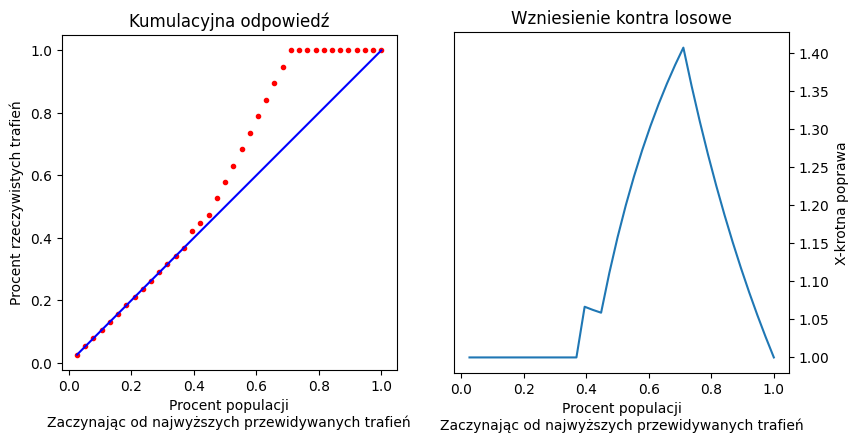

In [43]:
from sklearn import naive_bayes
import matplotlib.pyplot as plt

is_versicolor = iris.target == 1
tts_1c = train_test_split(iris.data, is_versicolor, test_size=0.33, random_state = 21)

(train_features, test_features, train_targets, test_targets) = tts

gnb = naive_bayes.GaussianNB()

probabilities = (gnb.fit(train_features, train_targets).predict_proba(test_features)[:,1])

order = np.argsort(-probabilities)

csum = test_targets[order].cumsum()
proc = csum / csum[-1]

N = test_targets.size
xs = np.linspace(1/N,1,N)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))
fig.tight_layout()

ax1.plot(xs, proc, 'r.')
ax1.plot(xs, xs, 'b-')
ax1.axes.set_aspect('equal')

ax1.set_title("Kumulacyjna odpowiedź")
ax1.set_ylabel("Procent rzeczywistych trafień")
ax1.set_xlabel("Procent populacji\n" + "Zaczynając od najwyższych przewidywanych trafień")


ax2.plot(xs, proc / np.where(xs > 0, xs, 1))

ax2.set_title("Wzniesienie kontra losowe")
ax2.set_ylabel("X-krotna poprawa")
ax2.set_xlabel("Procent populacji\n" + "Zaczynając od najwyższych przewidywanych trafień")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right');